In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

## 1. Data Processing

In [87]:
df = pd.read_csv('train_c.csv')
test_df = pd.read_csv("test_no_label.csv")
# Initial inspection
print(df.head())
print(df.info())
print(df.describe())
print(df['Class'].value_counts())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  23562    612.084         0.000000       122.512653      2.010000   
1 -36424    717.948       275.400182       168.756112      1.631942   
2 -37903    727.708       273.195588       177.348275      1.540447   
3  82619   1114.990       442.418929       239.709011      1.845650   
4  33423    659.036       224.168053       189.981080      1.179949   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.867457       23959     173.205283  0.698257  0.983430   0.790315   
1      0.790264       36768     215.351984  0.681791  0.990644   0.887997   
2      0.760650       38267     219.680674  0.766182  0.990488   0.899434   
3      0.840498       83605     324.335903  0.808500  0.988206   0.835118   
4      0.530805       33707     206.289809  0.772983  0.991574   0.967023   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.703370      0.010451      0.

#### Handle negative values

In [88]:
for col in ['Area', 'MajorAxisLength']:
        df[col] = df[col].abs() 
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  23562    612.084         0.000000       122.512653      2.010000   
1  36424    717.948       275.400182       168.756112      1.631942   
2  37903    727.708       273.195588       177.348275      1.540447   
3  82619   1114.990       442.418929       239.709011      1.845650   
4  33423    659.036       224.168053       189.981080      1.179949   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.867457       23959     173.205283  0.698257  0.983430   0.790315   
1      0.790264       36768     215.351984  0.681791  0.990644   0.887997   
2      0.760650       38267     219.680674  0.766182  0.990488   0.899434   
3      0.840498       83605     324.335903  0.808500  0.988206   0.835118   
4      0.530805       33707     206.289809  0.772983  0.991574   0.967023   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.703370      0.010451      0.

#### Check Class Distribution

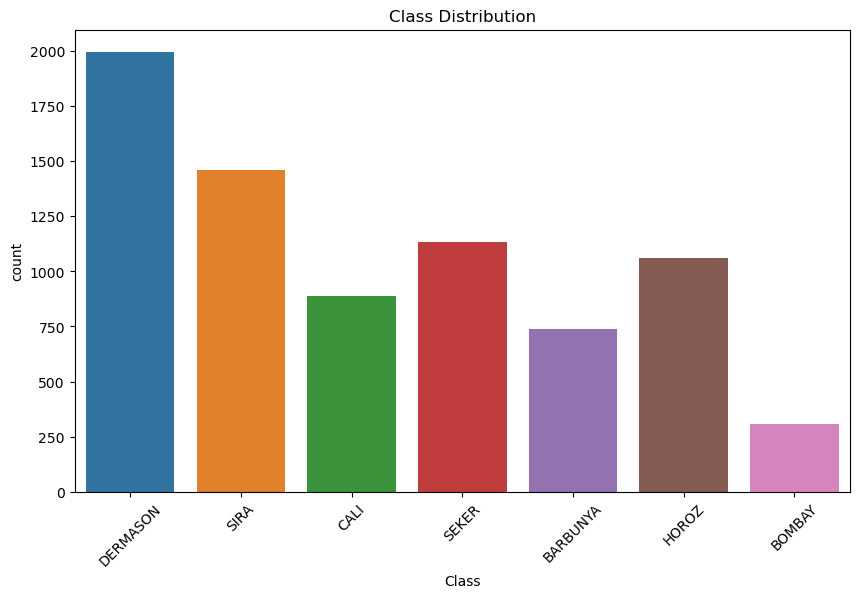

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

#### Encode the classes & Standardize

In [90]:
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

df.drop('id', axis=1, inplace=True)

features = df.drop(['Class', 'Class_encoded'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Class'] = df['Class']
scaled_df['Class_encoded'] = df['Class_encoded']

## 2.Data Exploration

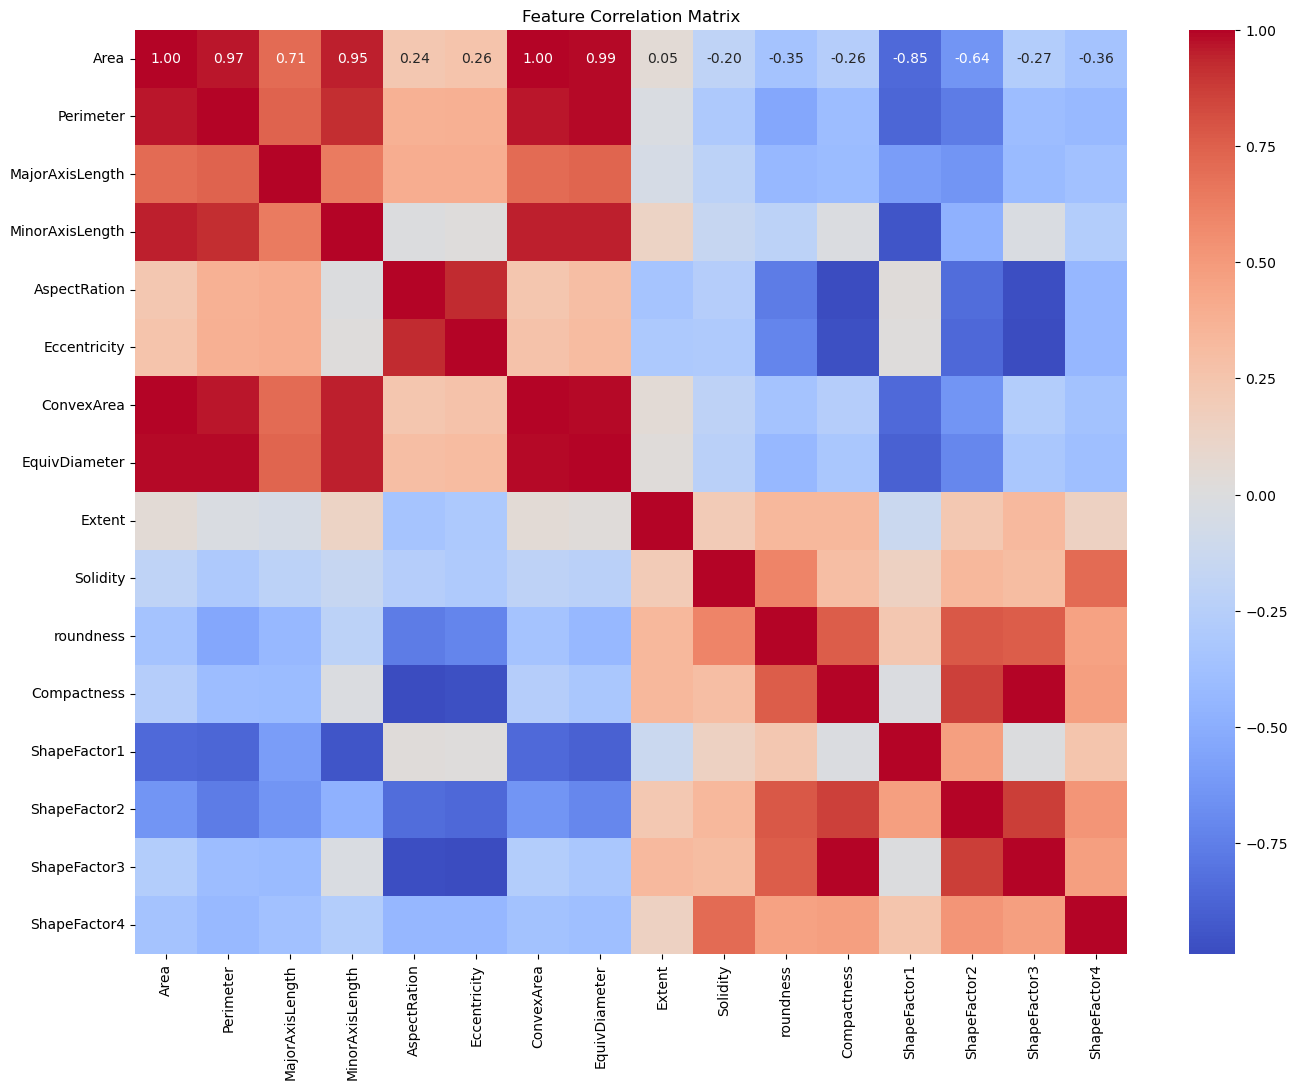

In [91]:
plt.figure(figsize=(16,12))
corr = scaled_df.drop(['Class', 'Class_encoded'], axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

#### Pairplot of some features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

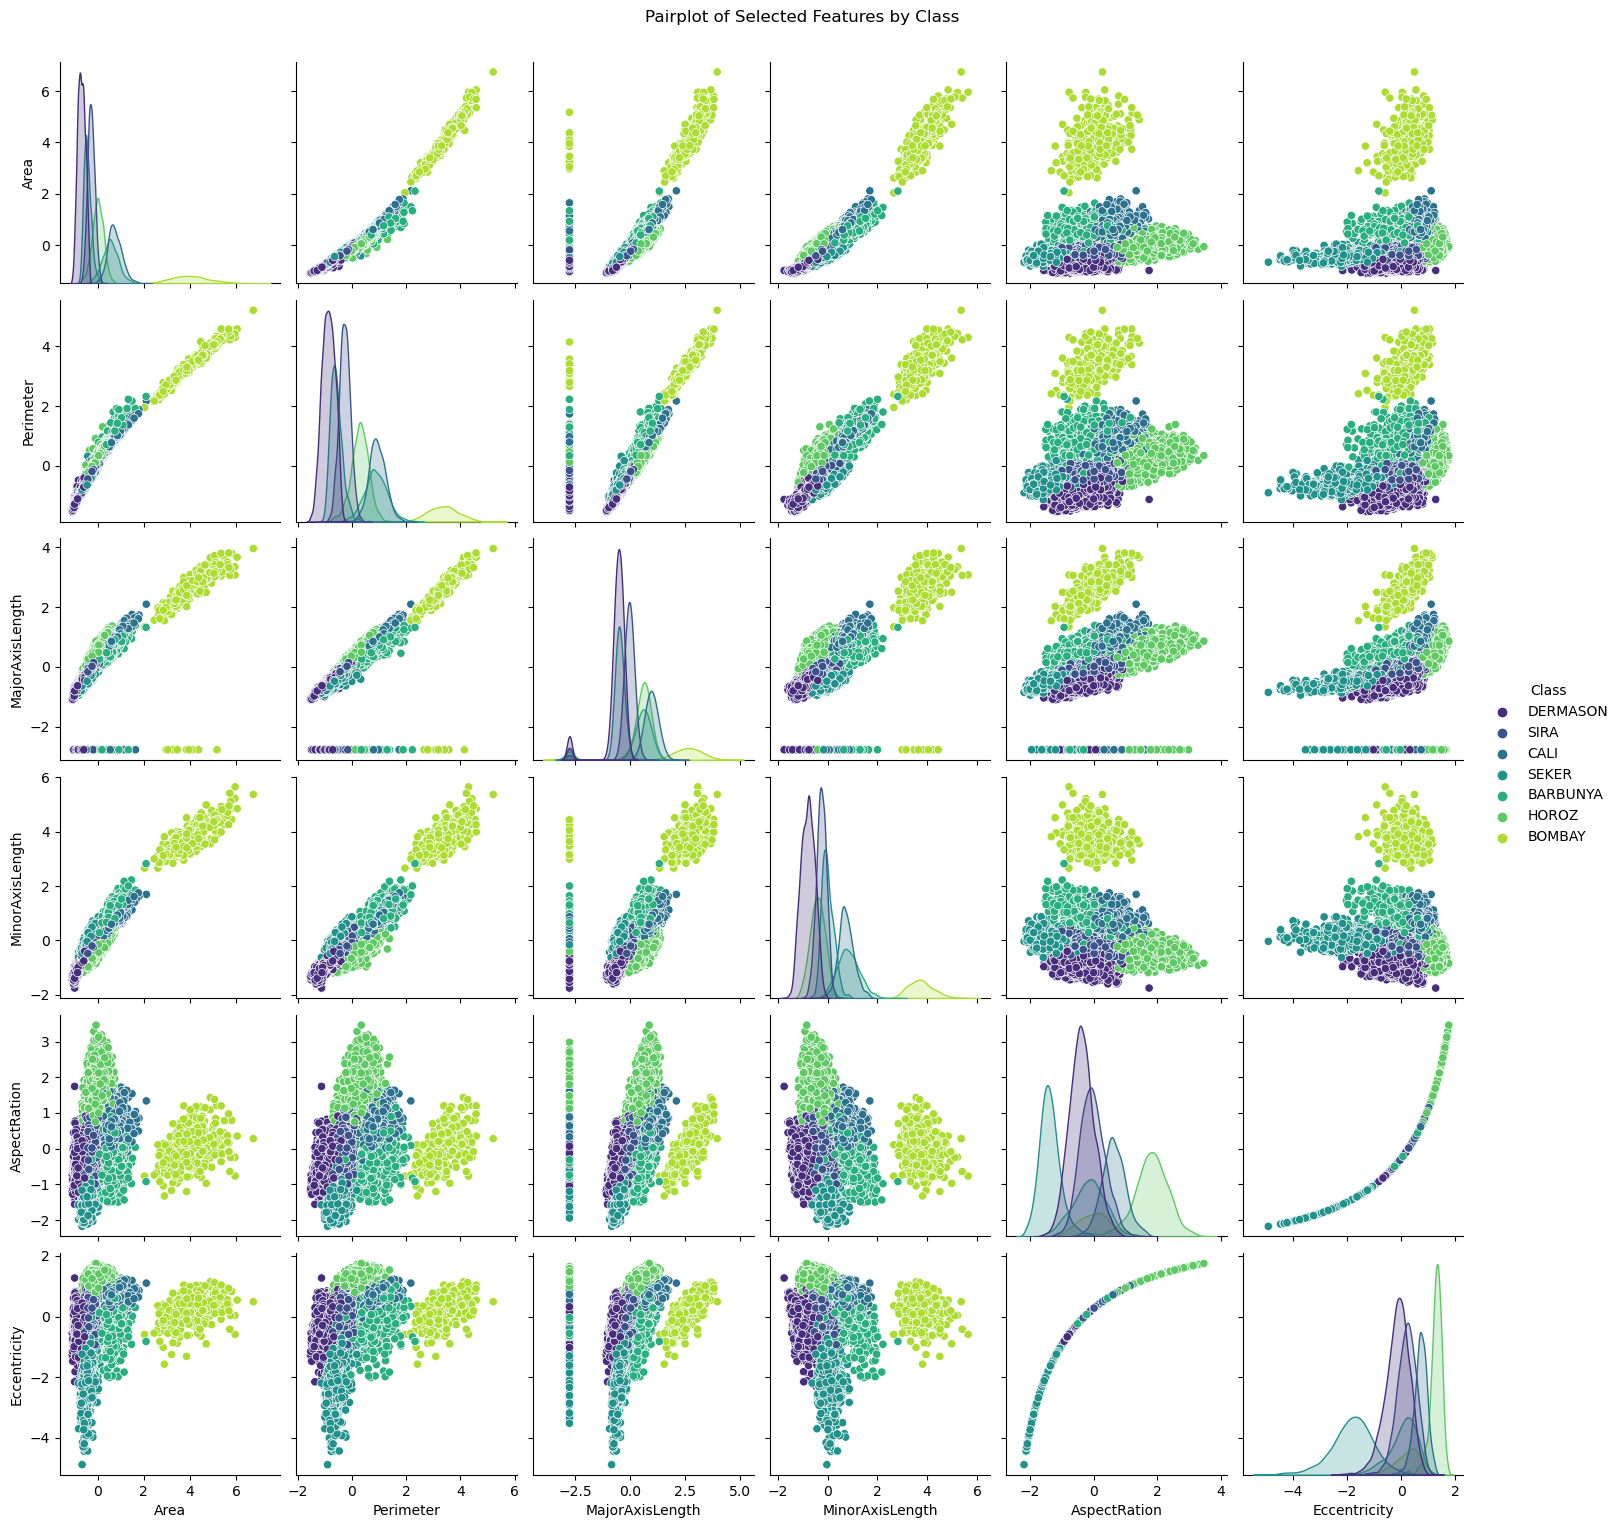

In [92]:
selected_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'Class']
sns.pairplot(scaled_df[selected_features], hue='Class', palette='viridis')
plt.suptitle('Pairplot of Selected Features by Class', y=1.02)
plt.show()

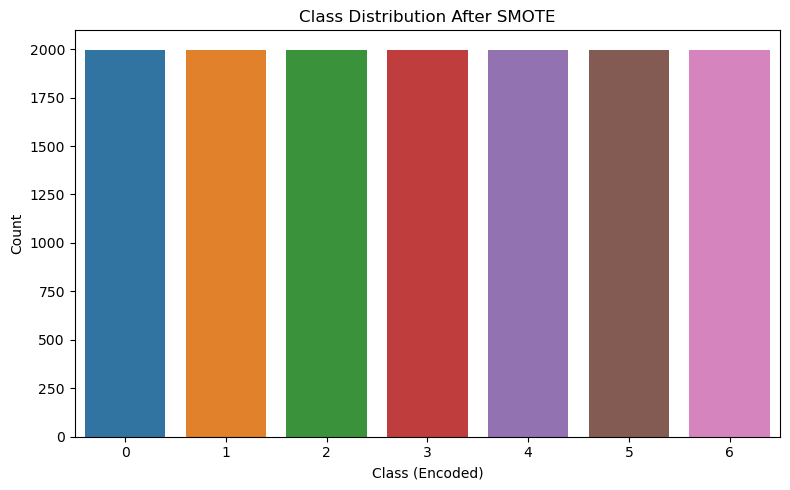

In [93]:
X = scaled_df.drop(['Class', 'Class_encoded'], axis=1)
y = scaled_df['Class_encoded']

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)


y_smote_df = pd.DataFrame(y_train_smote, columns=["Class_encoded"])
plt.figure(figsize=(8, 5))
sns.countplot(x='Class_encoded', data=y_smote_df)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3.Model Evolution

#### DataFrame for ME

In [94]:
report_df = pd.DataFrame(X_train_smote)
report_df['Class_Encoded'] =  y_train_smote
report_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_Encoded
0,-0.990838,-1.121489,-2.775837,-1.747470,1.743088,1.271700,-0.986373,-1.331975,-1.062001,-0.812286,-1.410526,-1.572036,3.409006,-0.232388,-1.510909,-0.158792,3
1,-0.560376,-0.633597,-0.263858,-0.735367,0.199923,0.428304,-0.564215,-0.629879,-1.400693,0.747249,0.243581,-0.291719,0.872461,0.046527,-0.325817,0.632524,3
2,-0.510878,-0.588616,-0.283966,-0.547316,-0.173543,0.104751,-0.514811,-0.557770,0.335096,0.713492,0.437244,0.069208,0.562484,0.240037,0.030925,0.217601,6
3,0.985664,1.196238,1.259553,0.817535,1.072240,0.977154,0.979437,1.185618,1.205524,0.220287,-0.651846,-1.087759,-1.063615,-1.281278,-1.077397,-0.729598,2
4,-0.660813,-0.905103,-0.731156,-0.270830,-1.645029,-2.406485,-0.665099,-0.780840,0.474986,0.948387,1.581775,1.961116,0.123004,2.103241,2.063937,0.946436,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13974,-0.314269,-0.189934,0.085250,-0.472488,0.619610,0.721439,-0.293508,-0.287757,-1.674037,-3.055367,-0.769991,-0.777933,0.544589,-0.499008,-0.790592,-3.158679,6
13975,-0.401300,-0.453326,-0.279282,-0.230961,-0.636472,-0.411567,-0.403510,-0.402989,0.927240,0.346315,0.495837,0.597709,0.070448,0.491019,0.571294,0.815397,6
13976,-0.228505,-0.140330,0.058514,-0.250818,0.182637,0.414352,-0.226004,-0.171311,-0.964442,-0.397361,-0.308200,-0.296779,0.123673,-0.287950,-0.330689,-0.146970,6
13977,-0.133632,-0.095593,0.186856,-0.192707,0.388560,0.567711,-0.138401,-0.049070,-1.284358,0.538557,0.225938,-0.480572,0.033940,-0.472234,-0.508435,0.180455,6


#### Testing Differenet Models

In [95]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "RBF SVM": SVC(kernel='rbf'),
}

accuracy_results = {}
cm_r={}
X = report_df.drop(['Class_Encoded'],axis =1)
y = report_df['Class_Encoded']

X_train, X_val , y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)
        accuracy_results[name] = accuracy_score(y_val, predictions)
        cm_r[name] = classification_report(y_val,predictions)
        print(name)
        print(cm_r[name])

accuracy_results

Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       399
           1       1.00      1.00      1.00       399
           2       0.98      0.98      0.98       399
           3       0.90      0.91      0.91       400
           4       0.98      0.98      0.98       400
           5       0.96      0.95      0.96       399
           6       0.86      0.88      0.87       400

    accuracy                           0.95      2796
   macro avg       0.95      0.95      0.95      2796
weighted avg       0.95      0.95      0.95      2796

Linear SVM
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       399
           1       1.00      1.00      1.00       399
           2       0.97      0.96      0.96       399
           3       0.90      0.86      0.88       400
           4       0.97      0.96      0.96       400
           5       0.96      0.92      0.94      

{'Gradient Boosting': 0.9510014306151645,
 'Linear SVM': 0.9349070100143062,
 'Logistic Regression': 0.9395565092989986,
 'K-Nearest Neighbors': 0.949928469241774,
 'Random Forest': 0.9542203147353362,
 'Naive Bayes': 0.9202432045779685,
 'Decision Tree': 0.9384835479256081,
 'RBF SVM': 0.9474248927038627}

### Training & Testing the optimal model

In [96]:
svm =SVC(kernel='rbf')
svm.fit(X, y)



test_ids = test_df['id']
for col in ['Area', 'MajorAxisLength']:
    test_df[col] = test_df[col].abs()
X_submit = test_df.drop('id', axis=1)
X_submit_scaled = scaler.transform(X_submit)
y_submit_pred =svm.predict(pd.DataFrame(X_submit_scaled, columns=X.columns))
y_submit_labels = le.inverse_transform(y_submit_pred)

# Export predictions
submission = pd.DataFrame({
    'id': test_ids,
    'Predicted': y_submit_labels
})
submission.to_csv('submission.csv', index=False)
print("Submission saved to submission.csv")

Submission saved to submission.csv
